In [1]:
pip install opencv-python

In [2]:
pip install mediapipe

  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow==2.5.0

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: termcolor~=1.1.0 in c:\users\admin\anaconda3\lib\site-packages (from tensorflow==2.5.0) (1.1.0)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


In [5]:
pip install tensorflow-gpu==2.5.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow 2.9.1 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.9.1 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.5.0 which is incompatible.
bokeh 2.4.2 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.



  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.2.0
    Uninstalling absl-py-1.2.0:
      Successfully uninstalled absl-py-1.2.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e97bee6ba0db112c5d46f2b479cd005cf4bd2307378f02aa64ad1013a2310cf8
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

            # Read feed
        ret, frame = cap.read()

            # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image,results)

            # Show to screen
        cv2.imshow('OpenCV Feed', image)

            # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.pose_landmarks.landmark)

33

In [8]:
draw_landmarks(frame, results)

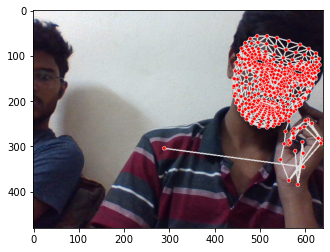

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
results.pose_landmarks

landmark {
  x: 0.82671165
  y: 0.3592521
  z: -0.8163945
  visibility: 0.9999987
}
landmark {
  x: 0.8676424
  y: 0.29549825
  z: -0.7477869
  visibility: 0.9999973
}
landmark {
  x: 0.88650435
  y: 0.30501717
  z: -0.7470478
  visibility: 0.9999977
}
landmark {
  x: 0.9019602
  y: 0.31376982
  z: -0.7461292
  visibility: 0.9999967
}
landmark {
  x: 0.80871886
  y: 0.27150175
  z: -0.7628912
  visibility: 0.99999726
}
landmark {
  x: 0.7881398
  y: 0.26460806
  z: -0.7619829
  visibility: 0.99999666
}
landmark {
  x: 0.76623535
  y: 0.25816244
  z: -0.76209015
  visibility: 0.9999947
}
landmark {
  x: 0.90350544
  y: 0.34759995
  z: -0.37251195
  visibility: 0.9999965
}
landmark {
  x: 0.7169845
  y: 0.2805993
  z: -0.45258442
  visibility: 0.9999975
}
landmark {
  x: 0.8430586
  y: 0.44629464
  z: -0.6850906
  visibility: 0.99999684
}
landmark {
  x: 0.7769302
  y: 0.41486937
  z: -0.7075336
  visibility: 0.999998
}
landmark {
  x: 0.93257797
  y: 0.7195622
  z: -0.2469986
  visibili

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose

[array([ 0.82671165,  0.3592521 , -0.81639451,  0.99999869]),
 array([ 0.8676424 ,  0.29549825, -0.74778688,  0.99999732]),
 array([ 0.88650435,  0.30501717, -0.74704778,  0.99999768]),
 array([ 0.90196019,  0.31376982, -0.74612921,  0.99999672]),
 array([ 0.80871886,  0.27150175, -0.76289117,  0.99999726]),
 array([ 0.78813982,  0.26460806, -0.76198292,  0.99999666]),
 array([ 0.76623535,  0.25816244, -0.76209015,  0.9999947 ]),
 array([ 0.90350544,  0.34759995, -0.37251195,  0.99999648]),
 array([ 0.71698451,  0.2805993 , -0.45258442,  0.9999975 ]),
 array([ 0.84305859,  0.44629464, -0.6850906 ,  0.99999684]),
 array([ 0.77693021,  0.41486937, -0.7075336 ,  0.99999797]),
 array([ 0.93257797,  0.71956217, -0.24699859,  0.99991262]),
 array([ 0.45180154,  0.63509166, -0.2358484 ,  0.99976426]),
 array([ 0.9795624 ,  1.26311541, -0.64294255,  0.88865799]),
 array([ 0.29903424,  0.98712838, -0.38179183,  0.28070384]),
 array([ 0.91261417,  0.80024952, -1.19841552,  0.99691403]),
 array([

In [13]:
len(results.face_landmarks.landmark)

468

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face

array([ 0.81256735,  0.41957974, -0.03134494, ...,  0.94725764,
        0.28779066,  0.01430929])

In [16]:
lh

array([ 8.82038593e-01,  7.81759739e-01, -8.19508557e-07,  8.54333341e-01,
        6.85649812e-01,  1.58594567e-02,  8.66073251e-01,  6.13608420e-01,
        1.86187737e-02,  8.71283591e-01,  5.57563305e-01,  1.09389834e-02,
        8.82666469e-01,  5.10269225e-01,  5.35734463e-03,  9.84228849e-01,
        5.89215159e-01,  4.64103036e-02,  9.60997820e-01,  5.19094646e-01,
        2.64564175e-02,  9.21643317e-01,  5.43487191e-01,  6.72320556e-03,
        8.98902714e-01,  5.87231219e-01, -3.45794228e-03,  9.96118963e-01,
        5.94254434e-01,  2.68814024e-02,  9.48398054e-01,  5.03925562e-01,
        3.12761310e-03,  9.00151193e-01,  5.45707464e-01, -1.08390190e-02,
        8.82017612e-01,  5.99401474e-01, -1.28694540e-02,  9.99927700e-01,
        6.01975262e-01,  3.58669320e-03,  9.39253092e-01,  5.07476985e-01,
       -1.79955307e-02,  8.94412160e-01,  5.56893170e-01, -1.67910568e-02,
        8.82666349e-01,  6.15763307e-01, -8.86841211e-03,  9.92579460e-01,
        6.11776829e-01, -

In [17]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
pose

array([ 8.26711655e-01,  3.59252095e-01, -8.16394508e-01,  9.99998689e-01,
        8.67642403e-01,  2.95498252e-01, -7.47786880e-01,  9.99997318e-01,
        8.86504352e-01,  3.05017173e-01, -7.47047782e-01,  9.99997675e-01,
        9.01960194e-01,  3.13769817e-01, -7.46129215e-01,  9.99996722e-01,
        8.08718860e-01,  2.71501750e-01, -7.62891173e-01,  9.99997258e-01,
        7.88139820e-01,  2.64608055e-01, -7.61982918e-01,  9.99996662e-01,
        7.66235352e-01,  2.58162439e-01, -7.62090147e-01,  9.99994695e-01,
        9.03505445e-01,  3.47599953e-01, -3.72511953e-01,  9.99996483e-01,
        7.16984510e-01,  2.80599296e-01, -4.52584416e-01,  9.99997497e-01,
        8.43058586e-01,  4.46294636e-01, -6.85090601e-01,  9.99996841e-01,
        7.76930213e-01,  4.14869368e-01, -7.07533598e-01,  9.99997973e-01,
        9.32577968e-01,  7.19562173e-01, -2.46998593e-01,  9.99912620e-01,
        4.51801538e-01,  6.35091662e-01, -2.35848397e-01,  9.99764264e-01,
        9.79562402e-01,  

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test=extract_keypoints(results)

In [21]:
result_test

array([ 0.82671165,  0.3592521 , -0.81639451, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
result_test.shape

(1662,)

In [23]:
np.save('0', result_test)

In [48]:
np.load('0.npy')

array([ 0.49953991,  0.71490872, -0.86825675, ...,  0.        ,
        0.        ,  0.        ])

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['about',  'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [49]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'about': 0, 'iloveyou': 1}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(60, 30, 1662)

In [33]:
np.array(labels).shape

(60,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(60, 30, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [39]:
y_test.shape

(3, 2)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [92]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [43]:
res = [.7, 0.2, 0.1]

In [44]:
actions[np.argmax(res)]

'about'

In [93]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [79]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
2/2 [==============================] - 9s 3s/step - loss: 0.7454 - categorical_accuracy: 0.2807
Epoch 2/2000
2/2 [==============================] - 0s 118ms/step - loss: 2.5141 - categorical_accuracy: 0.4912
Epoch 3/2000
2/2 [==============================] - 0s 109ms/step - loss: 1.5415 - categorical_accuracy: 0.5965
Epoch 4/2000
2/2 [==============================] - 0s 115ms/step - loss: 1.9789 - categorical_accuracy: 0.4386
Epoch 5/2000
2/2 [==============================] - 0s 119ms/step - loss: 1.7221 - categorical_accuracy: 0.4561
Epoch 6/2000
2/2 [==============================] - 0s 118ms/step - loss: 0.7651 - categorical_accuracy: 0.4912
Epoch 7/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.6872 - categorical_accuracy: 0.5965
Epoch 8/2000
2/2 [==============================] - 0s 99ms/step - loss: 0.6792 - categorical_accuracy: 0.6140
Epoch 9/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.8330 - categorical_accuracy: 0.7

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 596,642
Trainable params: 596,642
Non-trainable params: 0
________________________________________________

In [81]:
res = model.predict(X_test)

In [86]:
actions[np.argmax(res[2])]

'about'

In [87]:
actions[np.argmax(y_test[2])]

'about'

In [88]:
model.save('action.h5')

In [89]:
del model

In [94]:
model.load_weights('action.h5')

In [95]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [96]:
yhat = model.predict(X_test)

In [97]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [98]:
ytrue

[1, 0, 0]

In [99]:
yhat

[1, 0, 0]

In [100]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 2]],

       [[2, 0],
        [0, 1]]], dtype=int64)

In [101]:
accuracy_score(ytrue, yhat)

1.0

In [106]:
from scipy import stats

In [111]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

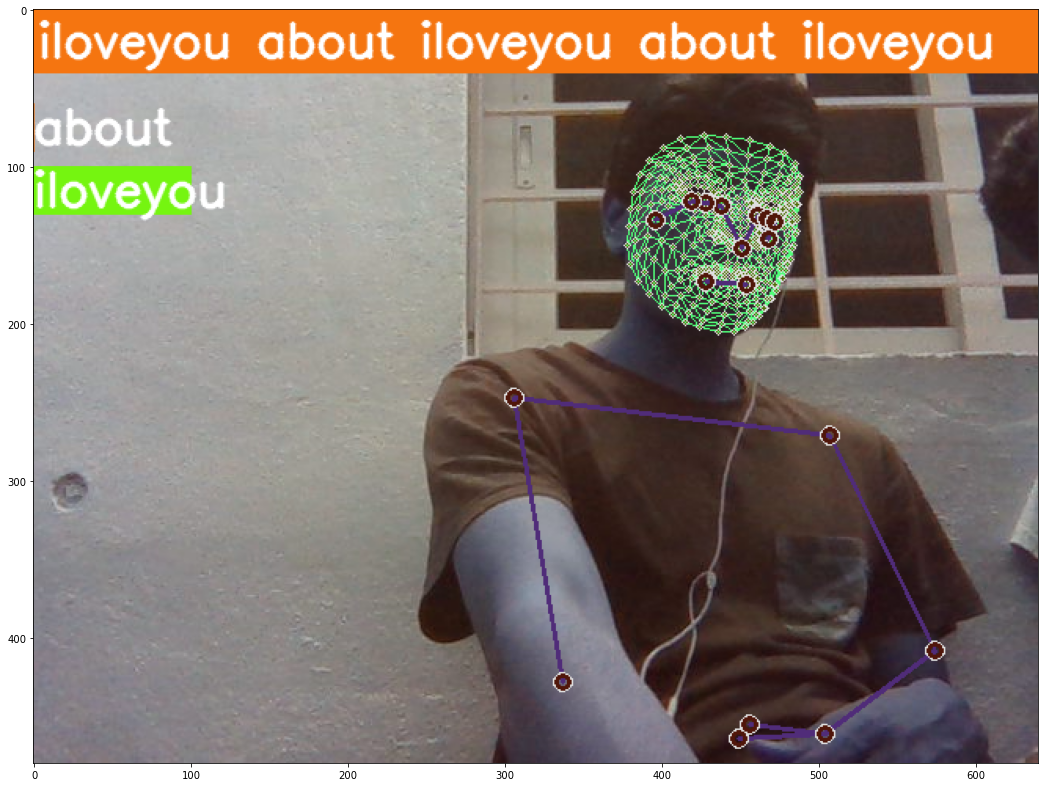

In [119]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [117]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [71]:
np.expand_dims(X_test[0],axis=0).shape

(1, 30, 1662)